<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
# from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [5]:
# os.listdir('input/genres/')

# List directory contents
genres = os.listdir('input/genres_2/')

# Sort the list in proper numerical order
genres_sorted = sorted(genres, key=lambda x: int(x[1:]))

# Print the sorted list
print(genres_sorted)

['M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50']


In [6]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [7]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [8]:
# Write the header to the CSV file
file_path = 'NumericalAudioData_2.csv'
try:
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
except IOError as e:
    print(f"Error opening or writing to file: {e}")

# List of genres
# genres = 'M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M41 M42 M43 M44 M45 M46 M47 M48 M49 M50 M51 M52 M53 M54 M55 M56 M57 M58 M59 M60 M61 M62 M63 M64 M65 M66 M67 M68 M69 M70 M71 M72'.split()

genres = 'M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M41 M42 M43 M44 M45 M46 M47 M48 M49 M50'.split()

print("genres:", genres)

# Process each genre and each file in the genre
for g in genres:
    genre_path = f'input/genres_2/{g}'
    if not os.path.isdir(genre_path):
        print(f"Directory not found: {genre_path}")
        continue
    
    for filename in os.listdir(genre_path):
        songname = os.path.join(genre_path, filename)
        print("songname:", songname)
        
        try:
            # Load the audio file
            y, sr = librosa.load(songname, mono=True, duration=30)
            
            # Extract features
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            
            # Prepare the row to append
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            
            # Append the row to the CSV file
            try:
                with open(file_path, 'a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
            except IOError as e:
                print(f"Error appending to file: {e}")
        
        except Exception as e:
            print(f"Error processing file {songname}: {e}")

print("Processing complete.")


genres: ['M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50']
songname: input/genres_2/M26\M26(1).wav
songname: input/genres_2/M26\M26(2).wav
songname: input/genres_2/M26\M26(3).wav
songname: input/genres_2/M26\M26(5).wav
songname: input/genres_2/M26\M26(6).wav
songname: input/genres_2/M26\M26(7).wav
songname: input/genres_2/M26\M26(8).wav
songname: input/genres_2/M26\M26(9).wav
songname: input/genres_2/M27\M27(1).wav
songname: input/genres_2/M27\M27(10).wav
songname: input/genres_2/M27\M27(2).wav
songname: input/genres_2/M27\M27(3).wav
songname: input/genres_2/M27\M27(4).wav
songname: input/genres_2/M27\M27(5).wav
songname: input/genres_2/M27\M27(6).wav
songname: input/genres_2/M27\M27(7).wav
songname: input/genres_2/M27\M27(8).wav
songname: input/genres_2/M27\M27(9).wav
songname: input/genres_2/M28\M28(1).wav
songname: input/genres_2/M28\M28(10).wav
songname: inpu

KeyboardInterrupt: 

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [ ]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData_2.csv')
data.head()

In [8]:
print(data.shape)

(255, 28)


In [9]:
data["label"].value_counts()

M38    13
M49    12
M29    11
M47    11
M31    11
M32    11
M43    11
M41    11
M39    10
M46    10
M45    10
M44    10
M42    10
M50    10
M27    10
M36    10
M35    10
M34    10
M33    10
M30    10
M28    10
M40     9
M48     9
M37     8
M26     8
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,20)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

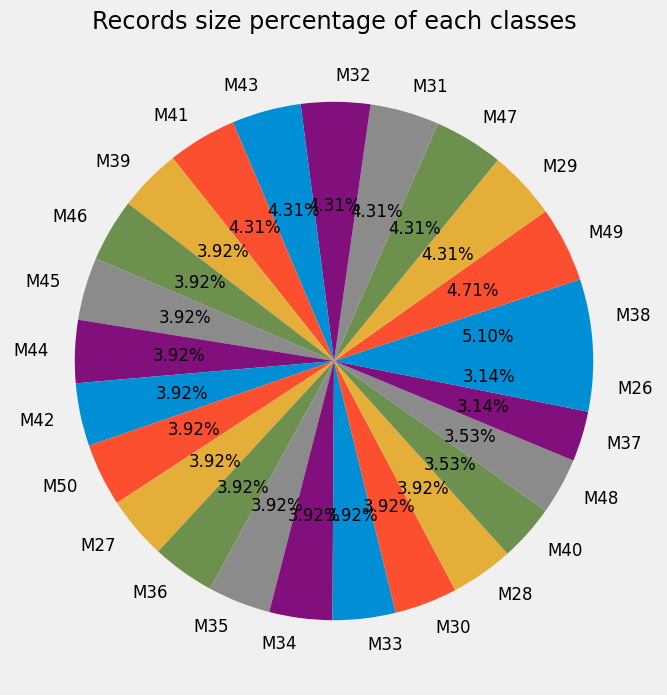

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(255, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         255 non-null    float64
 1   rmse                255 non-null    float64
 2   spectral_centroid   255 non-null    float64
 3   spectral_bandwidth  255 non-null    float64
 4   rolloff             255 non-null    float64
 5   zero_crossing_rate  255 non-null    float64
 6   mfcc1               255 non-null    float64
 7   mfcc2               255 non-null    float64
 8   mfcc3               255 non-null    float64
 9   mfcc4               255 non-null    float64
 10  mfcc5               255 non-null    float64
 11  mfcc6               255 non-null    float64
 12  mfcc7               255 non-null    float64
 13  mfcc8               255 non-null    float64
 14  mfcc9               255 non-null    float64
 15  mfcc10              255 non-null    float64
 16  mfcc11  

In [15]:
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.213580  0.025447        1558.826681         1905.486121  2940.623885   
1     0.260256  0.004472        2243.838808         2642.292112  5339.026049   
2     0.286959  0.045468        1682.402881         1598.939220  3208.513932   
3     0.303222  0.162047        2592.052335         2149.872206  4809.862582   
4     0.417932  0.033915        1750.027366         2000.390645  3428.520935   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.061933 -359.470398  106.760048 -22.038950  12.199837  ...   
1            0.064784 -466.373993   87.660378   7.073028  24.479059  ...   
2            0.093426 -266.499115  124.485054 -58.275414  19.715542  ...   
3            0.140128  -96.471565   56.569260 -58.014874  12.140656  ...   
4            0.089982 -311.165161   86.264526 -20.900240  27.918356  ...   

      mfcc12     mfcc13     mfcc14     mfcc15    mfcc16     mfcc17    mfcc18  \
0  -8.606391  -8.817083   0.912931  -5.425427 -3.060758  -6.578137 -5.376870   
1   3.201445  -4.692705  -0.582725  -9.366573  1.103282 -10.133548 -1.890662   
2  -6.718418  -8.532345  -3.206018  -6.381493 -7.293687 -13.789155 -4.541039   
3  -0.980811 -18.787018  -7.030920 -14.055365 -2.162450 -15.736951 -2.926817   
4  11.602830   1.592898  11.610696   1.020583  7.801735  -0.789993  4.931620   

      mfcc19     mfcc20  label  
0 -10.684655  -0.092934    M26  
1  -4.806808  -0.822733    M26  
2  -8.603098  -4.312668    M26  
3  -7.469049  -0.042863    M26  
4   6.675980  10.942696    M26  

[5 rows x 27 columns]

In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=100)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.249144  0.098302        1464.180152          992.659741  2620.159156   
1     0.310501  0.073805        2020.026071         1917.942320  3894.009787   
2     0.282497  0.076599        2076.230628         2129.429711  3909.801358   
3     0.298301  0.029329        1024.341389         1018.203850  1785.147539   
4     0.242119  0.016981        1476.641230         1511.571302  2737.616779   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.110490 -258.958588  168.472748 -81.093994  23.283947  ...   
1            0.105109 -227.066956   88.460899 -36.685699  30.902514  ...   
2            0.099209 -270.731232   76.964043 -12.560761  30.799009  ...   
3            0.060434 -328.587036  163.963654 -20.097012   4.349787  ...   
4            0.067620 -382.728516   96.835030 -32.518913  31.300068  ...   

     mfcc12     mfcc13     mfcc14     mfcc15    mfcc16    mfcc17    mfcc18  \
0 -9.279005   2.418447 -12.442014 -22.479540 -4.286162  1.252327 -1.711363   
1  3.979270 -13.917307  -0.847147  -4.940472 -5.080440 -0.688312  0.023635   
2  1.532500  -9.277244   1.520600  -1.911538 -0.796566 -2.908473  4.959753   
3  7.417535   1.927474   3.991322  -2.667963  4.090461  4.499146 -7.024987   
4 -6.978453 -15.453469  -3.004838  -3.871526 -3.744789  1.828494  0.687365   

      mfcc19    mfcc20  label  
0  -3.582275 -7.686278    M29  
1  -9.638813 -2.501321    M37  
2  -9.164396 -2.026284    M45  
3  -3.164257 -3.512062    M38  
4 -10.633523  6.174968    M48  

[5 rows x 27 columns]

In [18]:
df.shape

(2500, 27)

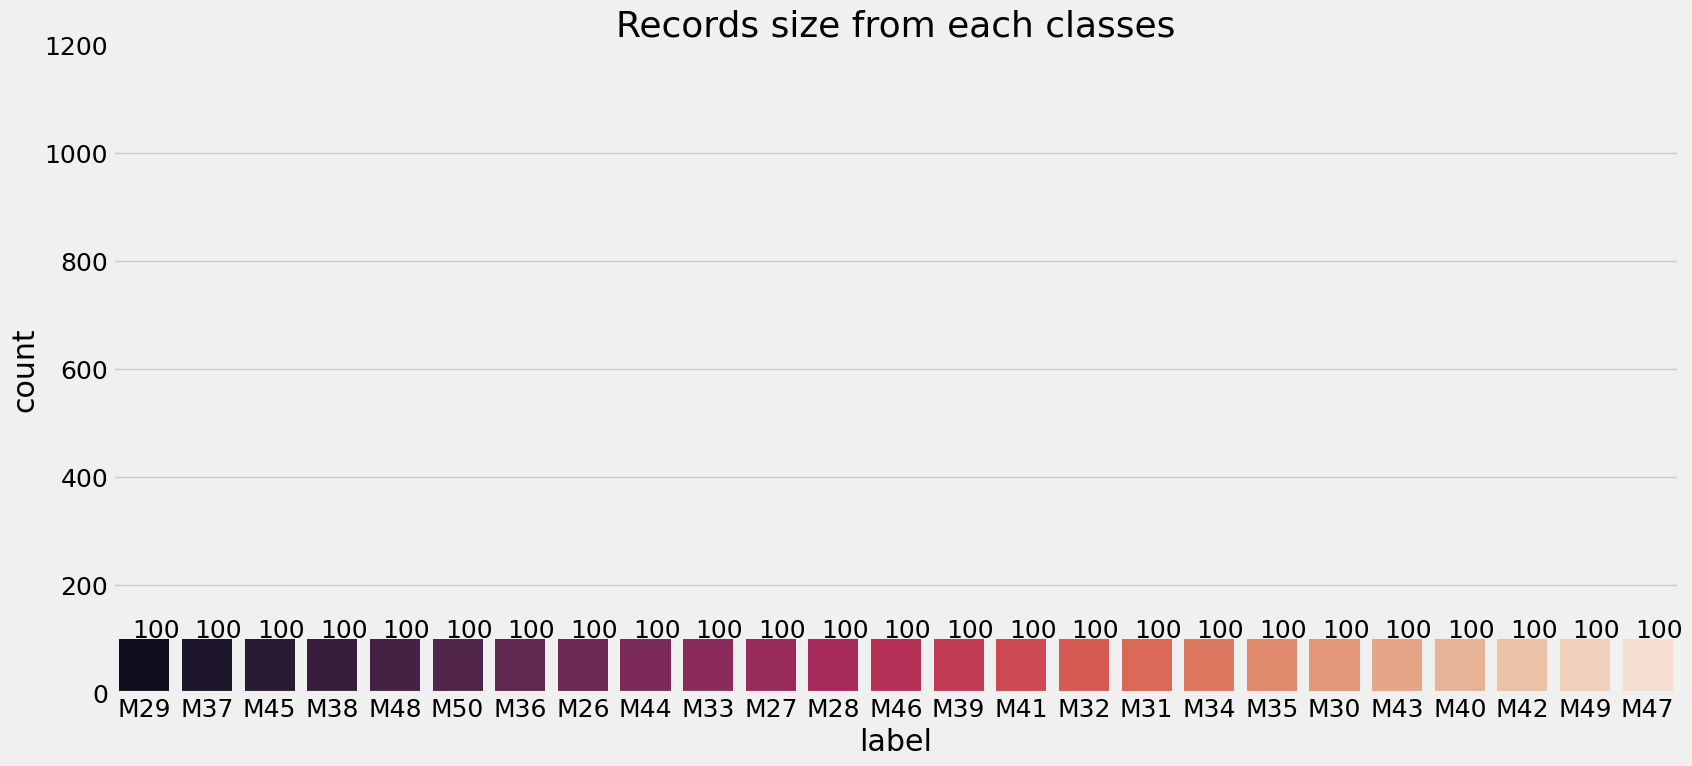

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,1200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.249144  0.098302        1464.180152          992.659741  2620.159156   
1     0.310501  0.073805        2020.026071         1917.942320  3894.009787   
2     0.282497  0.076599        2076.230628         2129.429711  3909.801358   
3     0.298301  0.029329        1024.341389         1018.203850  1785.147539   
4     0.242119  0.016981        1476.641230         1511.571302  2737.616779   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.110490 -258.958588  168.472748 -81.093994  23.283947  ...   
1            0.105109 -227.066956   88.460899 -36.685699  30.902514  ...   
2            0.099209 -270.731232   76.964043 -12.560761  30.799009  ...   
3            0.060434 -328.587036  163.963654 -20.097012   4.349787  ...   
4            0.067620 -382.728516   96.835030 -32.518913  31.300068  ...   

      mfcc11    mfcc12     mfcc13     mfcc14     mfcc15    mfcc16    mfcc17  \
0  -5.459641 -9.279005   2.418447 -12.442014 -22.479540 -4.286162  1.252327   
1 -15.182608  3.979270 -13.917307  -0.847147  -4.940472 -5.080440 -0.688312   
2  -8.744146  1.532500  -9.277244   1.520600  -1.911538 -0.796566 -2.908473   
3   8.200677  7.417535   1.927474   3.991322  -2.667963  4.090461  4.499146   
4 -14.933646 -6.978453 -15.453469  -3.004838  -3.871526 -3.744789  1.828494   

     mfcc18     mfcc19    mfcc20  
0 -1.711363  -3.582275 -7.686278  
1  0.023635  -9.638813 -2.501321  
2  4.959753  -9.164396 -2.026284  
3 -7.024987  -3.164257 -3.512062  
4  0.687365 -10.633523  6.174968  

[5 rows x 26 columns]

In [22]:
y = df[["label"]]
y.head(10)

label
0   M29
1   M37
2   M45
3   M38
4   M48
5   M50
6   M36
7   M26
8   M45
9   M26

In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.038989  0.067811          -0.233945           -1.439776 -0.363364   
1     1.240955 -0.272288           0.887912            0.654695  0.845793   
2     0.692371 -0.233503           1.001349            1.133418  0.860782   
3     1.001953 -0.889753          -1.121666           -1.381954 -1.155969   
4    -0.098624 -1.061189          -0.208795           -0.265167 -0.251872   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0            1.015181  0.065474  1.626345 -2.150339  0.261059  ... -1.113961   
1            0.839366  0.375860 -0.676143 -0.304857  0.772338  ...  0.906579   
2            0.646570 -0.049104 -1.006987  0.697706  0.765392  ...  0.533695   
3           -0.620457 -0.612187  1.496588  0.384521 -1.009604  ...  1.430564   
4           -0.385637 -1.139120 -0.435162 -0.131697  0.799018  ... -0.763360   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  1.476425 -1.752438 -3.134704 -0.608495  0.954643 -0.164309  0.212256   
1 -0.999697  0.069026  0.158017 -0.739910  0.661386  0.165521 -0.933867   
2 -0.296371  0.440981  0.726659 -0.031130  0.325890  1.103895 -0.844089   
3  1.402005  0.829113  0.584650  0.777444  1.445281 -1.174448  0.291361   
4 -1.232543 -0.269930  0.358698 -0.518923  1.041710  0.291698 -1.122103   

     mfcc20  label  
0 -1.684782    M29  
1 -0.589326    M37  
2 -0.488962    M45  
3 -0.802871    M38  
4  1.243766    M48  

[5 rows x 27 columns]

In [24]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         2500 non-null   float64
 1   rmse                2500 non-null   float64
 2   spectral_centroid   2500 non-null   float64
 3   spectral_bandwidth  2500 non-null   float64
 4   rolloff             2500 non-null   float64
 5   zero_crossing_rate  2500 non-null   float64
 6   mfcc1               2500 non-null   float64
 7   mfcc2               2500 non-null   float64
 8   mfcc3               2500 non-null   float64
 9   mfcc4               2500 non-null   float64
 10  mfcc5               2500 non-null   float64
 11  mfcc6               2500 non-null   float64
 12  mfcc7               2500 non-null   float64
 13  mfcc8               2500 non-null   float64
 14  mfcc9               2500 non-null   float64
 15  mfcc10              2500 non-null   float64
 16  mfcc11

In [26]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

{'M26': 0, 'M27': 1, 'M28': 2, 'M29': 3, 'M30': 4, 'M31': 5, 'M32': 6, 'M33': 7, 'M34': 8, 'M35': 9, 'M36': 10, 'M37': 11, 'M38': 12, 'M39': 13, 'M40': 14, 'M41': 15, 'M42': 16, 'M43': 17, 'M44': 18, 'M45': 19, 'M46': 20, 'M47': 21, 'M48': 22, 'M49': 23, 'M50': 24}


In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'chroma_stft': [ 3.89890790e-02  1.24095474e+00  6.92371395e-01  1.00195267e+00
 -9.86238128e-02 -7.63797549e-01  3.02308137e-01  1.09836011e+00
 -8.40294703e-02  3.58117865e-01 -4.94498711e-01  7.99361739e-01
  5.08786733e-01  3.96651180e-01  5.55109963e-01  4.09255862e-01
  2.56663890e-01 -1.60686224e+00  1.28297813e+00 -1.41565263e-01
 -6.18447870e-01 -1.21437763e-01  6.30783596e-01 -5.38568394e-01
  8.09996027e-01 -6.36639422e-01  6.53133993e-01 -9.57961329e-01
  6.51906219e-01  5.81983216e-01  1.11522634e-01  3.26207409e-01
 -1.21491529e+00  8.11011875e-01 -7.09277481e-01  3.88294041e-02
  1.73273878e+00  4.04650103e-01  2.16823986e-01  4.79819566e-02
  4.41283666e-01 -3.57852625e-01  1.93415740e+00 -4.68660904e-02
  7.04695260e-01 -1.18978711e-01  1.84993080e+00  5.46073007e-01
 -6.14373720e-02  4.52297438e-01  3.66248148e-01 -1.43185828e+00
 -8.15892136e-01 -4.06752588e-02  1.15860161e+00 -6.10649780e-01
  3.18189804e-01 -1.34697809e+00 -6.78763523e-01 -1.876789

In [28]:
df['label'] = df['label'].map(class_dict)
df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.038989  0.067811          -0.233945           -1.439776 -0.363364   
1     1.240955 -0.272288           0.887912            0.654695  0.845793   
2     0.692371 -0.233503           1.001349            1.133418  0.860782   
3     1.001953 -0.889753          -1.121666           -1.381954 -1.155969   
4    -0.098624 -1.061189          -0.208795           -0.265167 -0.251872   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0            1.015181  0.065474  1.626345 -2.150339  0.261059  ... -1.113961   
1            0.839366  0.375860 -0.676143 -0.304857  0.772338  ...  0.906579   
2            0.646570 -0.049104 -1.006987  0.697706  0.765392  ...  0.533695   
3           -0.620457 -0.612187  1.496588  0.384521 -1.009604  ...  1.430564   
4           -0.385637 -1.139120 -0.435162 -0.131697  0.799018  ... -0.763360   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  1.476425 -1.752438 -3.134704 -0.608495  0.954643 -0.164309  0.212256   
1 -0.999697  0.069026  0.158017 -0.739910  0.661386  0.165521 -0.933867   
2 -0.296371  0.440981  0.726659 -0.031130  0.325890  1.103895 -0.844089   
3  1.402005  0.829113  0.584650  0.777444  1.445281 -1.174448  0.291361   
4 -1.232543 -0.269930  0.358698 -0.518923  1.041710  0.291698 -1.122103   

     mfcc20  label  
0 -1.684782      3  
1 -0.589326     11  
2 -0.488962     19  
3 -0.802871     12  
4  1.243766     22  

[5 rows x 27 columns]

In [29]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0     0.038989  0.067811          -0.233945           -1.439776 -0.363364   
1     1.240955 -0.272288           0.887912            0.654695  0.845793   
2     0.692371 -0.233503           1.001349            1.133418  0.860782   
3     1.001953 -0.889753          -1.121666           -1.381954 -1.155969   
4    -0.098624 -1.061189          -0.208795           -0.265167 -0.251872   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc11  \
0            1.015181  0.065474  1.626345 -2.150339  0.261059  ...  0.528567   
1            0.839366  0.375860 -0.676143 -0.304857  0.772338  ... -0.796233   
2            0.646570 -0.049104 -1.006987  0.697706  0.765392  ...  0.081038   
3           -0.620457 -0.612187  1.496588  0.384521 -1.009604  ...  2.389851   
4           -0.385637 -1.139120 -0.435162 -0.131697  0.799018  ... -0.762311   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -1.113961  1.476425 -1.752438 -3.134704 -0.608495  0.954643 -0.164309   
1  0.906579 -0.999697  0.069026  0.158017 -0.739910  0.661386  0.165521   
2  0.533695 -0.296371  0.440981  0.726659 -0.031130  0.325890  1.103895   
3  1.430564  1.402005  0.829113  0.584650  0.777444  1.445281 -1.174448   
4 -0.763360 -1.232543 -0.269930  0.358698 -0.518923  1.041710  0.291698   

     mfcc19    mfcc20  
0  0.212256 -1.684782  
1 -0.933867 -0.589326  
2 -0.844089 -0.488962  
3  0.291361 -0.802871  
4 -1.122103  1.243766  

[5 rows x 26 columns]

In [30]:
y = df[["label"]]
y.head()

label
0      3
1     11
2     19
3     12
4     22

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2000, 26) (500, 26) (2000, 1) (500, 1)


In [32]:
X_train.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
273      1.413926 -0.177719           1.650869            1.540725  1.563663   
634      0.256664 -1.234851           1.339631            2.294334  2.217422   
1626    -1.951254 -1.048082          -1.055177           -0.804236 -0.911252   
1915    -0.518193  1.056169          -1.452774           -2.103546 -1.415569   
2197    -0.605981  0.757873          -0.917102           -1.167406 -0.834899   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
273             1.892048  0.258177 -1.245626  0.255129 -0.918492  ...   
634            -0.478305 -1.953202 -0.699180  1.513630  0.341263  ...   
1626           -1.186480 -2.115743 -0.188596  0.179649  0.131108  ...   
1915           -0.629435  0.466597  2.034892  0.170109 -1.972341  ...   
2197           -0.575493 -0.096847  0.089770 -0.679861 -0.620315  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
273  -0.433909  0.439026 -0.352771  0.717196  0.540368  0.492162  0.372422   
634  -0.269816  0.788039  0.398539  0.110565 -0.672923  0.283206 -0.765917   
1626  0.438295 -0.360010  0.076021 -0.735317 -0.058634  0.761717  1.793038   
1915  0.505928  0.325801  1.222640 -0.529270  0.695352 -0.068375  0.930109   
2197  1.690048 -0.932743 -0.440759  1.256687  0.836043 -0.101458  0.032862   

        mfcc18    mfcc19    mfcc20  
273   0.496069 -0.253924  0.112022  
634  -0.198394 -0.019471 -0.234680  
1626  1.567895  1.608839  1.270177  
1915  1.181544  1.044648 -0.332442  
2197 -1.590983 -1.103591 -1.394097  

[5 rows x 26 columns]

In [33]:
y_train.head()

label
273       9
634       0
1626     23
1915     17
2197      2

In [34]:
X_test.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
667      0.488913 -1.190338           0.462299           -0.018171  0.180319   
1289    -0.636639 -0.979325           0.501455            0.983626  0.679135   
2155    -0.002791  0.433472          -0.749727            0.121784 -0.891156   
406      0.867523 -0.294391           0.353286            0.555606  0.508262   
1777     0.508787  2.770687          -0.020984            0.178240  0.027512   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
667             0.806147 -1.519003 -0.326365 -0.885249  0.605773  ...   
1289           -0.294055 -0.941811 -0.165881  0.389547  0.360551  ...   
2155           -0.999848  0.599704  0.933496  1.303694 -0.911044  ...   
406            -0.195200  0.372550 -0.085675  0.154137  0.157711  ...   
1777           -0.026955  1.634420  0.558604 -0.102856  0.191307  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
667  -0.426917 -0.002464  0.674701 -0.567652 -1.317775 -1.078112 -0.154916   
1289  0.812132  0.664078  0.422411  0.101740 -0.443386  1.389536  0.808338   
2155 -0.405127 -0.273426 -0.196686 -0.079779  0.399394 -0.055147  0.009607   
406   0.504130 -0.395158  0.026107 -0.271194 -0.279151  0.574934  0.035686   
1777  0.284419  0.890031  1.535174  0.119152  0.313842  1.122719 -0.520399   

        mfcc18    mfcc19    mfcc20  
667  -0.355543  0.097344  0.752534  
1289  1.303127  1.052657  0.175068  
2155 -0.362515 -0.946397 -0.978984  
406   0.040520  0.313901 -0.061202  
1777 -0.185412  0.908373  0.042021  

[5 rows x 26 columns]

In [35]:
y_test.head()

label
667      11
1289      7
2155      8
406       7
1777     24

In [36]:
X_train.to_csv("splitted_data_B/X_train.csv", index=False)
X_test.to_csv("splitted_data_B/X_test.csv", index=False)
y_train.to_csv("splitted_data_B/y_train.csv", index=False)
y_test.to_csv("splitted_data_B/y_test.csv", index=False)

---